# Input
The following code sections are input blocks.

Mount the google drive to take data from it

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


Input the training and validation data

In [ ]:
import cv2
import os
import glob
import numpy as np
data_path = os.path.join('/content/gdrive/My Drive/LandscapeData','*g')
files = glob.glob(data_path)
gray = []
ab = []
i = 0
for f1 in files:
    img = cv2.cvtColor(cv2.imread(f1), cv2.COLOR_BGR2LAB)
    img = cv2.resize(img, (256, 256))
    img = img.astype('float32')/255.0
    gray.append(img[:, :, 0].reshape((256, 256, 1)))
    ab.append(img[:, :, 1:])
    img = 0
    i += 1
    print(i)
    if i == 4000:
      break
gray = np.array(gray)
ab = np.array(ab)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


Input the test data

In [ ]:
import cv2
import os
import glob
import numpy as np
data_path = os.path.join('/content/gdrive/My Drive/LandscapeData','*g')
files = glob.glob(data_path)
gray_test = []
ab_test = []
i = 0
for f1 in files:
  
    i += 1
    if i < 4000:
      continue
    print(i)
    img = cv2.cvtColor(cv2.imread(f1), cv2.COLOR_BGR2LAB)
    img = cv2.resize(img, (256, 256))
    img = img.astype('float32')/255.0
    gray_test.append(img[:, :, 0].reshape((256, 256, 1)))
    ab_test.append(img[:, :, 1:])
    img = 0
gray_test = np.array(gray_test)
ab_test = np.array(ab_test)

4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199


Here we test if the data has been input successfully.

Recreated image


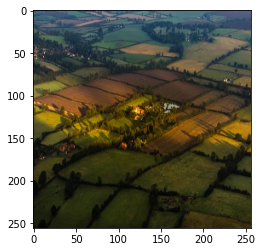

In [ ]:
import matplotlib.pyplot as plt
import cv2

n = 5

w, h, d = gray[n].shape
img = np.zeros((w, h, 3))
img[:, :, :1] = gray[n]
img[:, :, 1:] = ab[n]
img *= 255
img = img.astype('uint8')
img_ = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)

print('Recreated image')
plt.imshow(img_)
plt.show()


#Model

Define the structure of the model and compile it

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import datasets, layers, models

model = models.Sequential()

model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(None, None, 1), padding="same"))

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu',  padding="same"))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu',  padding="same"))

model.add(layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding="same"))
model.add(layers.Conv2DTranspose(2, (3, 3), strides=2, padding="same"))

model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.AUTO),
              metrics=['accuracy'])

epochs_n = 0

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 1)     10        
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 32)    320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 32)   0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 32)    9248      
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 64)    18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 64)   0         
 2D)                                                    

Training the model

In [ ]:
from keras.models import load_model
train_image = gray[:3000]
train_label = ab[:3000]
test_image = gray[3000:]
test_label = ab[3000:]

checkpoint_path = "/content/gdrive/My Drive/MyCNN/"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=True)
 
epochs = 70               
# model.load_weights(checkpoint_path)

history = model.fit(train_image, train_label, epochs=epochs, validation_data=(test_image, test_label), callbacks=[cp_callback])
epochs_n += epochs
print(epochs_n)

70


Save Model

In [ ]:
model_path = "/content/gdrive/My Drive/MyCNN/FinalModel"
model_dir = os.path.dirname(model_path)
model.save(model_dir)

# Test
Load the Model

In [ ]:
import tensorflow as tf
model_path = "/content/gdrive/My Drive/MyCNN/FinalModel"
model_dir = os.path.dirname(model_path)
model = tf.keras.models.load_model(model_dir)

Visualize the output by choosing a random image n

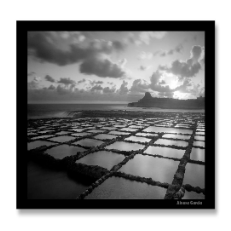

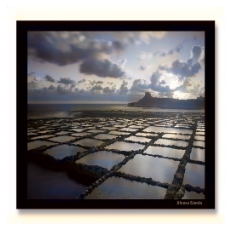

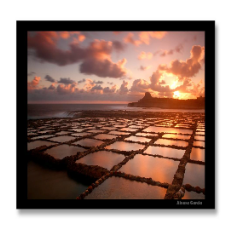

In [ ]:
import matplotlib.pyplot as plt
import cv2

n = 3462

pred = model.predict(np.array([gray[n]]))

w, h, d = gray[n].shape

img = np.zeros((w, h))
img[:, :] = gray[n].reshape((w, h))
img *= 255
img = img.astype('uint8')
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

img = np.zeros((w, h, 3))
img[:, :, :1] = gray[n]
img[:, :, 1:] = pred[0]
img *= 255
img = img.astype('uint8')
img_ = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
plt.axis('off')
plt.imshow(img_)
plt.show()

img = np.zeros((w, h, 3))
img[:, :, :1] = gray[n]
img[:, :, 1:] = ab[n]
img *= 255
img = img.astype('uint8')
img_ = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
plt.axis('off')
plt.imshow(img_)
plt.show()


Calculate the test accuracy

In [ ]:
# EVALUATE
eval = model.evaluate(gray_test, ab_test, return_dict=True)
print(eval)

10/10 [==============================] - 16s 2s/step - loss: 0.0036 - accuracy: 0.6757
{'loss': 0.003559574019163847, 'accuracy': 0.675667941570282}


Function to test images

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_model(f):

  image = cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2LAB)
  image = image.astype('float32')/255.0
  w, h, d = image.shape

  gray = image[:, :, 0].reshape((w, h, 1))
  ab = image[:, :, 1:]


  pred = model.predict(np.array([gray]))
  print(pred.shape)


  img = np.zeros((w, h))
  img[:, :] = gray.reshape((w, h))
  img *= 255
  img = img.astype('uint8')
  plt.axis('off')
  plt.imshow(img, cmap='gray')
  plt.show()

  img = np.zeros((w, h, 3))
  img[:, :, :1] = gray
  img[:, :, 1:] = cv2.resize(pred[0], (h, w))
  img *= 255
  img = img.astype('uint8')
  img_ = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
  plt.axis('off')
  plt.imshow(img_)
  plt.show()

  img = np.zeros((w, h, 3))
  img[:, :, :1] = gray
  img[:, :, 1:] = ab
  img *= 255
  img = img.astype('uint8')
  img_ = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
  plt.axis('off')
  plt.imshow(img_)
  plt.show()


Test on a random image from dataset

/content/gdrive/My Drive/LandscapeData/00000577_(4).jpg
(1, 680, 1024, 2)


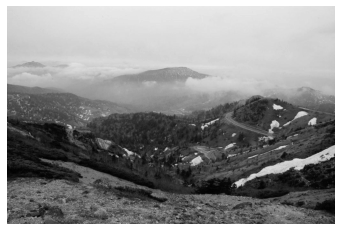

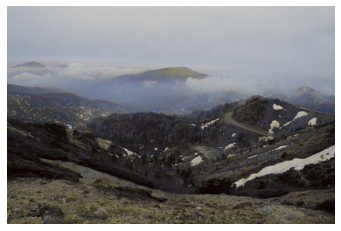

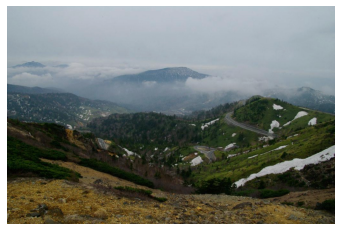

In [ ]:
import os
import glob
data_path = os.path.join('/content/gdrive/My Drive/LandscapeData','*g')
files = glob.glob(data_path)

f = files[np.random.randint(len(files))]
print(f)
apply_model(f)

Upload an image to test

Saving unnamed.jpg to unnamed (1).jpg
(1, 340, 512, 2)


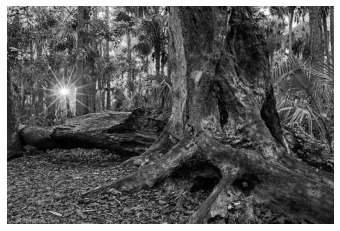

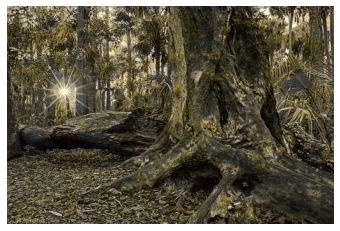

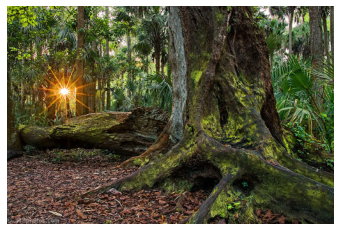

In [ ]:
from google.colab import files
uploaded = files.upload() 
f = list(uploaded.keys())[0]

apply_model(f)